## Primeiro Trabalho Computacional: Álgebra, Números e Criptografia 2018

### Fernanda Scovino

**Data: 29/09/18**


Resolução dos problemas de implementação do livro *Números inteiros e criptografia RSA - Coutinho, S. C. IMPA, 2014 - 2ª edição*, do cap. 1 ao 6.

---

#### Índice de exercícios:

* [Capítulo 1: Algoritmos Fundamentais](#Capítulo-1:-Algoritmos-Fundamentais)
* [Capítulo 2: Fatoração Única](#Capítulo-2:-Fatoração-Única)
* [Capítulo 3: Números Primos](#Capítulo-3:-Números-Primos)
* [Capítulo 4: Aritmética Modular](#Capítulo-4:-Aritmética-Modular)
* [Capítulo 5: Indução e Fermat](#Capítulo-5:-Indução-e-Fermat)
* [Capítulo 6: Pseudoprimos](#Capítulo-6:-Pseudoprimos)

#### Pacotes auxiliares:

In [247]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from itertools import combinations

### Capítulo 1: Algoritmos Fundamentais

#### Exercício 9:

Sejam $a, b \in \mathbb{Z}$. O máximo divisor comum (mdc) entre $a$ e $b$ é definido como $d = máx\{d \in \mathbb{Z} : d|a, d|b\}$.

O **algoritmo euclidiano** (implementado abaixo) calcula o $mdc(a,b)$ de forma recursiva, descrita abaixo:

Sejam $r, q \in \mathbb{Z} : a = bq + r$.
* Se r = 0, então $mdc(a,b) = b$
* Caso contrário, $mdc(a,b) = mdc(r,a)$

Ele se baseia em dois teoremas, provados em sala (e também no livro):

(i) Sejam $a, b \in \mathbb{Z}_+$. Logo, existem $r, q \in \mathbb{Z} : a = bq + r$, e $q,r$ são únicos (*teorema da divisão*)

(ii) Sejam $a, b, r, q \in \mathbb{Z}_+$, e $a = bq + r$. Logo, $mdc(r,b) = mdc(b, a)$.

In [4]:
def mdc(a, b):
    
    """
    Calcula o máximo divisor comum (mdc) entre os inteiros a e b pelo algoritmo de euclidiano.
    
    :param a: inteiro
    :param b: inteiro
    
    :return m: mdc entre a e b
    """
    
    if b % a == 0:
        
        return a
    
    else: 
        
        r = a
        while b % r != 0:

            a = b % r
            b = r
            r = a
        
        return r

In [5]:
a = 68*3*5*5*13
b = 68*2*7*11

mdc(a,b)

68

In [6]:
import numpy as np

In [7]:
def mdc_adaptado(n):
    
    """
    Calcula o máximo divisor comum (mdc) de n pares aleatórios de inteiros, e retorna a razão de co-primos gerada.
    
    :param n: número de pares a serem gerados
    
    :return r: razão entre total de co-primos e total de pares gerados
    """
    
    r = 0
    
    for i in range(n):
        
        a = np.random.randint(1,10000)
        b = np.random.randint(1,10000)
    
        d = mdc(a,b)
        
        if d == 1:
            
            r += 1
            
    return r/n

In [8]:
%%time
M = np.zeros([5,10])

for i in range(5):
    for j in range(10):
        
        n = i+1
        M[i,j] = mdc_adaptado(10**n)

CPU times: user 10.7 s, sys: 24 ms, total: 10.7 s
Wall time: 10.8 s


As razões obtidas com os experimentos foram:

In [9]:
M = DataFrame(data=M, columns=['#{}'.format(i) for i in range(1,11)], index=[10**i for i in range(1,6)])
M

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10
10,0.80000,0.30000,0.70000,0.70000,0.80000,0.60000,0.60000,0.70000,0.80000,0.70000
100,0.68000,0.68000,0.57000,0.64000,0.64000,0.66000,0.60000,0.57000,0.67000,0.57000
1000,0.60100,0.60200,0.62400,0.60900,0.62100,0.61300,0.59200,0.60100,0.58500,0.62200
10000,0.61260,0.60850,0.61100,0.61070,0.60960,0.60950,0.60850,0.59980,0.61110,0.61070
100000,0.60749,0.60682,0.60973,0.60627,0.60941,0.60697,0.60724,0.61008,0.60833,0.60754


Seja $r$ a razão de co-primos sobre o número total de pares testado.
Na questão é dito que, quando $n \rightarrow \infty$, temos $r \rightarrow \frac{6}{\pi^2}$.

Para verificar essa convergência, para valor $a_{ij}$ na tabela acima, a tabela abaixo contém a diferença $a_{ij} - \frac{6}{\pi^2}$.

In [10]:
p = 6/(np.pi**2)

S = (M - p)
S

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10
10,0.192073,-0.307927,0.092073,0.092073,0.192073,-0.007927,-0.007927,0.092073,0.192073,0.092073
100,0.072073,0.072073,-0.037927,0.032073,0.032073,0.052073,-0.007927,-0.037927,0.062073,-0.037927
1000,-0.006927,-0.005927,0.016073,0.001073,0.013073,0.005073,-0.015927,-0.006927,-0.022927,0.014073
10000,0.004673,0.000573,0.003073,0.002773,0.001673,0.001573,0.000573,-0.008127,0.003173,0.002773
100000,-0.000437,-0.001107,0.001803,-0.001657,0.001483,-0.000957,-0.000687,0.002153,0.000403,-0.000387


Plotando essas diferenças, temos:

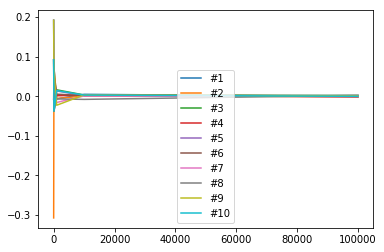

In [11]:
S.plot(legend=True)

#### Exercicio 8:

O **algoritmo de euclidiano estendido** (implementado abaixo), além de calcular $d = mdc(a,b)$, obtém $x, y \in \mathbb{Z} : ax+by = d$. 

A cada iteração do **algoritmo euclidiano**, acrescentamos alguns passos:

* Iniciamos $x_a = 1, y_a = 0, x_b = 0, y_b = 1$

Sejam $r, q \in \mathbb{Z} : a = bq + r$.
* Se $r = 0$, então $mdc(a,b) = b$, e $x = x_b, y = y_b$
* Caso contrário, $mdc(a,b) = mdc(r,a)$
* Atualizamos:
 * $x_a, x_b = x_b, x_a - qx_b$
 * $y_a, y_b = y_b, y_a - qy_b$
 
A equação $x, y \in \mathbb{Z} : ax+by = c$ tem solução $\Longleftrightarrow$ $mdc(a,b) | c$. 

Se $x', y' \in \mathbb{Z} : ax'+by' = d$ e $c' \in \mathbb{Z} : c'd = c \Longrightarrow a(x'c') +b(y'c') = (dc') = c$

In [12]:
def euclidiano_estend(a,b,c):
    
    """
    Calcula x, y inteiros tais que ax + by = c pelo algoritmo euclidiano estendido.
    
    :param a: inteiro
    :param b: inteiro
    :param c: inteiro
    
    :return x,y: inteiros solução da equação
    """
    
    d = mdc(a, b)
    
    if c % d != 0:
        
        print("Não existe solução para a equação, pois mdc(a,b) não divide c!")
    
    else:
        
        # algoritmo de euclidiano estendido
        
        c = c/d
        
        x1 = 1
        y1 = 0
        
        x2 = 0
        y2 = 1
        
        r = a/d
        b = b/d
        
        while b % r != 0:

            a = b % r
            q = (b-a)/r
            b = r
            r = a
            
            x1, x2 = x2, x1 - x2*q
            y1, y2 = y2, y1 - y2*q
            
        
        return c*y2, c*x2

Exemplo 1:

In [13]:
a, b, c = 160, 1234, 2
x, y = euclidiano_estend(a, b, c)
x, y

(54.0, -7.0)

In [14]:
x*a + y*b

2.0

Exemplo 2:

In [15]:
a, b, c = 159, 1234, 1
x, y = euclidiano_estend(a, b, c)
x, y

(-357.0, 46.0)

In [16]:
x*a + y*b

1.0

Exemplo 3:

In [17]:
euclidiano_estend(14, 22, 3)

Não existe solução para a equação, pois mdc(a,b) não divide c!


### Capítulo 2: Fatoração Única

#### Exercício 11:

Solução adaptada do [StackOverflow](https://codereview.stackexchange.com/questions/156986/find-highly-composite-number-using-python-3), otimizei a busca por divisores limitando os valores até o piso da metade de $n$, já que o menor divisor possível diferente de 1 e $n$ é o 2, logo, o maior seria $d \in \mathbb{Z}: 2d = n$.

In [18]:
def lista_div(M):
    
    """
    Gera a lista dos divisores de todos os inteiros positivos até determinado valor.
    
    :param M: valor máximo dos inteiros
    
    :return lista_divisores: lista dos divisores dos inteiros positivos até M
    """
    
    lista_divisores = {1: 1}

    for n in range(2, M+1):

        divisores = 2 # começamos com 1 e o próprio número

        if n > 3:
            
            for divisor in range(int(np.floor(n/2)), 1, -1):

                if (n % divisor) == 0:

                    divisores += 1

        lista_divisores[n] = divisores
        
    return lista_divisores

def get_highly_composite_number(M):
    
    """
    Determina todos os números altamente compostos (hcn) menores que r.
    
    :param r: inteiro
    
    :return l: lista dos números altamente compostos (hcn) menores que r
    """
    
    divisor_list = lista_div(M)
    highly_composite_number_list = []
    
    n = 1
    for i in range(1, len(divisor_list)+1):
        
        if divisor_list[i] > n:
            
            highly_composite_number_list.append(i)
            n = divisor_list[i]
    
    return highly_composite_number_list

In [19]:
%%time
get_highly_composite_number(7560)

CPU times: user 1.86 s, sys: 28 ms, total: 1.89 s
Wall time: 1.89 s


[2,
 4,
 6,
 12,
 24,
 36,
 48,
 60,
 120,
 180,
 240,
 360,
 720,
 840,
 1260,
 1680,
 2520,
 5040,
 7560]

#### Exercício 12:

**OBS:** a escolha do teste dos critérios de parada importa, pois, se $n$ é primo, então $x = \frac{(n+1)}{2}$ e $y = \frac{(n-1)}{2}$. 

Logo, $x$ é inteiro, e, se colocarmos esse como o teste, as soluções seriam $x + y = n$ e $x - y = 1$ fatores de $n$, mas, para definirmos números primos, assumimos que $1$ não é um fator. Então, saindo da iteração, escolhi como testar se $x = (n+1)/2$, que, caso positivo, sabemos que n é primo.

In [20]:
def alg_Fermat(n):
    
    """
    Calcula os fatores de n e retorna p1, p2 tais que p1p2 = n.
    
    :param n: inteiro positivo ímpar
    
    :return p1, p2: fatores de n
    """
    
    # checa a paridade de n
    if n % 2 == 0: 
        
        print("O número passado deve ser ímpar, {} não é!".format(n))
        return 
    
    # parte inteira de raiz de n
    x = np.floor(n**(1/2))
    
    if x**2 == n:
        
        return x
    
    else:
        
        # valor incial qualquer
        y = 0.1
        
        while (y.is_integer() == False) and (x < (n+1)/2):
            
            x += 1
            y = (x**2 - n)**(1/2)
        
        print('x:', x, '\ny: ', y)
        
        if x == (n+1)/2: 
            
            print("\nO número {} é primo!".format(n))
        
        else:
            
            return x + y, x - y

In [21]:
alg_Fermat(223)

x: 112.0 
y:  111.0

O número 223 é primo!


In [22]:
alg_Fermat(221)

x: 15.0 
y:  2.0


(17.0, 13.0)

In [23]:
alg_Fermat(221*5)

x: 41.0 
y:  24.0


(65.0, 17.0)

### Capítulo 3: Números Primos

#### Exercício 10:

Como é dito no livro, o crivo de Eratóstenes é o mais antigo método de busca de números primos. 

Ele recebe esse nome pois, partindo de uma lista de números ímpares maiores que 1, a cada iteração $k$ escolhemos o $n_{k}$ = $k$-ésimo número da lista e cortamos todos os seus múltiplos, ou seja, pulamos de $n_k$ em $n_k$ números e "riscamos" esses valores. Depois de passarmos por todas as "peneiras", ficamos somente com os númeors primos não riscados.

Isso funciona pois todos os múltiplos ímpares de $n_k$ são da forma $n_k + 2in_k$, sendo $ i \in \mathbb{Z}$. Logo, a distância entre eles é $2in_k$, e retirando os pares do intervalo, reduzimos essa distância à metade, que ainda é múltiplo de $n_k$.

Porém, podemos observar duas coisas:

1. Para todo $m$ na lista, $1 < m < n \rightarrow \sqrt{m} < \sqrt{n}$. Se m for composto, sabemos que $\exists d < \sqrt{m} : m \equiv 0 \textrm{ mod } d$. **Logo, só precisamos verificar os números até $\sqrt{n}$, pois todos os números compostos vão ser riscados numa iteração anterior, já que têm um divisor menor que $\sqrt{n}$.**

2. Outras repetições ainda ocorrem: quando estamos riscando os múltiplos de um primo p, alguns deles podem também ser múltiplos de primos menores, e portanto acabam sendo riscados mais de uma vez. **Para reduzir isso, podemos começar a riscar os múltiplos de p a partir de $p^2$, pois qualquer múltiplo menor já foi riscado.**

Assim, seja n um número ímpar o qual queremos descobrir todos os primos menores que $n$. Criamos uma lista de $\frac{n-1}{2}$ posições, sendo cada posição $i$ correspondendte a um ímpar $2i + 1 \in [3, n]$. Usamos $1$ para valores não riscados e $0$ para valores riscados, logo a lista começa com todos os valores iguais a $1$. A cada iteração, verificamos os itens (1) e (2):

- Seja P o valor atual:
    - Se $P^2 > n$, paramos as iterações e retornamos os números correspondentes aos índices da lista cujo valor é $1$
    - Caso contrário, riscamos os múltiplos de $P$ começando de $P^2$ e pulando de $P$ em $P$

In [24]:
def crivo_eratostenes(n):
    
    """
    Lista os primos ímpares menores ou iguais a n.
    
    :param n: inteiro positivo
    
    :return primos: lista de primos ímpares menores ou iguais a n 
    """
    
    if n % 2 == 0:
        
        n = n - 1
        
    # acrescentei 1 pois os índices da lista python começam em 0!
    v = [1 for i in range(0, 1+int((n-1)/2))] 
    P = 3
    
    # limitamos as iterações até raiz de n!
    while P**2 <= n: 
        
        if v[int((P-1)/2)] == 0:

            P += 2

        else:
            
            # começamos com p²
            T = P**2 
            while T <= n:
                
                v[int((T-1)/2)] = 0
                # escolhemos o próximo múltiplo de p para riscar!
                T += 2*P
                
            P += 2
            
    primos = []
    
    for i in range(len(v)):
        
        if v[i] == 1 and i != 0:
            
            try:
                primos.append(2*i+1)
            except:
                pass
    
    return primos
    

def busca_primos_pol(a, b, c):
    
    """
    Busca os valores de x, entre 0 e 100, para os quais ax² + bx + c é primo
    
    :param a: coeficiente de 2ª ordem
    :param b: coeficiente de 1ª ordem
    :param c: valor independente
    
    :return x: valores de x para os quais f(x) é primo
    """
    
    f = lambda x : a*x**2 + b*x + c
    
    if f(0) < f(100):
        
        l = f(0)
        u = f(100)
        
    else:
        
        l = f(100)
        u = f(0)
        
    primos = list(set(crivo_eratostenes(abs(u))) - set(crivo_eratostenes(abs(l))))
    
    f_x = {f(i): i for i in range(0, 101)}
    
    y_primos = set(primos) & set(f_x.keys())
    x_primos = set(f_x[y] for y in y_primos)
    
    return x_primos

(1) $f(x)  = x^2 + 1$

In [25]:
a = 1
b = 0
c = 1

x = busca_primos_pol(a, b, c)
f = lambda x: a*x**2 + b*x + c

list(zip(x, list(map(f, x))))

[(2, 5),
 (66, 4357),
 (4, 17),
 (90, 8101),
 (6, 37),
 (36, 1297),
 (40, 1601),
 (10, 101),
 (74, 5477),
 (14, 197),
 (16, 257),
 (20, 401),
 (84, 7057),
 (54, 2917),
 (56, 3137),
 (24, 577),
 (26, 677),
 (94, 8837)]

(2) $f(x)  = x^2 -69x + 1231$

In [26]:
a = 1
b = -69
c = 1231

x = busca_primos_pol(a, b, c)
f = lambda x: a*x**2 + b*x + c

list(zip(x, list(map(f, x))))

[(70, 1301),
 (71, 1373),
 (72, 1447),
 (73, 1523),
 (74, 1601),
 (77, 1847),
 (78, 1933),
 (80, 2111),
 (81, 2203),
 (82, 2297),
 (83, 2393),
 (85, 2591),
 (86, 2693),
 (87, 2797),
 (88, 2903),
 (89, 3011),
 (90, 3121),
 (92, 3347),
 (93, 3463),
 (94, 3581),
 (95, 3701),
 (96, 3823),
 (97, 3947),
 (98, 4073),
 (99, 4201)]

(3) $f(x)  = 2x^2 - 199$

In [27]:
a = 2
b = 0
c = 199

x = busca_primos_pol(a, b, c)
f = lambda x: a*x**2 + b*x + c

list(zip(x, list(map(f, x))))

[(33, 2377),
 (99, 19801),
 (36, 2791),
 (69, 9721),
 (6, 271),
 (72, 10567),
 (42, 3727),
 (12, 487),
 (27, 1657),
 (93, 17497),
 (30, 1999)]

(4) $f(x)  = 8x^2 - 530x + 7681$

In [28]:
a = 8
b = -530
c = 7681

x = busca_primos_pol(a, b, c)
f = lambda x: a*x**2 + b*x + c

list(zip(x, list(map(f, x))))

[(69, 9199),
 (70, 9781),
 (72, 10993),
 (74, 12269),
 (77, 14303),
 (78, 15013),
 (79, 15739),
 (80, 16481),
 (81, 17239),
 (82, 18013),
 (83, 18803),
 (84, 19609),
 (85, 20431),
 (86, 21269),
 (87, 22123),
 (88, 22993),
 (89, 23879),
 (90, 24781),
 (92, 26633),
 (93, 27583),
 (94, 28549),
 (95, 29531),
 (96, 30529),
 (97, 31543),
 (98, 32573),
 (99, 33619)]

#### Exercício 11:

Para o cálculo de $\pi(x)$, foi implementado o crivo de Eratóstenes no exercício anterior. Implementamos aqui a aproximação de $\pi(x)$, dada por:

$S(x) = \frac{x}{log x}\left( 1 + \left[ \sum_{k=0}^{12} a_k(log(log x))^k \right]^\left( \frac{-1}{4}\right) \right)$

In [29]:
a0 = 229168.50747390
a1 = -42449.7206839
a2 = 199330.41355048
a3 = 28226.22049280
a4 = 0
a5 = 0
a6 = -34712.81875914
a7 = 0
a8 = 33820
a9 = -25379.82656589
a10 = 8386.14942934
a11 = -1360.44512548
a12 = 89.14545378

In [35]:
a = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12]
a_n = [lambda x: a[k]*np.log(np.log(x))**k for k in range(len(a))]

S = lambda x: (1+ sum([a_k(x) for a_k in a_n])**(-1/4))*x/np.log(x)

In [36]:
pi = lambda x: 1+ len(crivo_eratostenes(x)) # adicionamos o 2, que é primo mas não é ímpar!

Para $x = 11$:

In [37]:
S(11)

5.746875863726586

In [38]:
pi(11)

5

Para $x = 100$:

In [39]:
S(100)

22.899773264110465

In [40]:
pi(100)

25

Construindo a tabela para os valores do enunciado:

In [41]:
x = [11, 100] + [1000*i for i in range(1,11)]
x

[11, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

In [42]:
T = DataFrame(index = x)

T['pi(x)'] = T.index.map(pi)
T['S(x)'] = T.index.map(S)
T['x/log(x)'] = T.index.map(lambda x: x/np.log(x))

In [43]:
T['pi(x) - S(x)'] = T['pi(x)'] - T['S(x)']
T['pi(x) - x/log(x)'] = T['pi(x)'] - T['x/log(x)']
T

,pi(x),S(x),x/log(x),pi(x) - S(x),pi(x) - x/log(x)
11,5,5.746876,4.587356,-0.746876,0.412644
100,25,22.899773,21.714724,2.100227,3.285276
1000,168,148.899345,144.764827,19.100655,23.235173
2000,303,269.707025,263.126650,33.292975,39.873350
3000,430,383.442640,374.701758,46.557360,55.298242
4000,550,493.014979,482.273458,56.985021,67.726542
5000,669,599.682163,587.047856,69.317837,81.952144
6000,783,704.140822,689.693641,78.859178,93.306359
7000,900,806.830344,790.632993,93.169656,109.367007
8000,1007,908.051571,890.155202,98.948429,116.844798


Primeiro, vale notar que ambas as aproximações substimam o valor real $\pi(x)$, com exceção de $S(11)$. Aliás, exceto para $x=11$, $S(x)$ aproxima melhor $\pi(x)$ do que $\frac{x}{logx}$ para os valores do enunciado. Observando também a diferença entre os dois erros de aproximação, vemos que eles vão se distanciando, ou seja, a taxa de crescimento do erro de $\pi(x)$ aumenta mais que $S(x)$ a medida que x cresce.

In [44]:
T['diff'] = T['pi(x) - x/log(x)'] - T['pi(x) - S(x)']
T['diff']

11        1.159520
100       1.185049
1000      4.134518
2000      6.580375
3000      8.740882
4000     10.741521
5000     12.634307
6000     14.447181
7000     16.197351
8000     17.896369
9000     19.552473
10000    21.171797
Name: diff, dtype: float64

#### Exercício 12:

In [45]:
def primos_mod_4(x):
    
    """
    Calcula os primos menores ou iguais a x da forma 4n+1 e da forma 4n+3
    
    :param x: inteiro positivo
    
    :return pi1, pi3: número de primos menores que x da forma 4n+1 (pi1) e 4n+3 (pi3)
    """
    
    primos = crivo_eratostenes(x)
    
    pi1 = []
    pi3 = []
    
    for primo in primos:
        
        if primo % 4 == 1:
            
            pi1.append(primo)
            
        else:
            pi3.append(primo)
            
    return len(pi1), len(pi3)

In [46]:
x = [100*i for i in range(1001)]

In [47]:
T = DataFrame(index = x)

T['pi1'] = 0
T['pi3'] = 0

for i in x:
    
    p1, p3 = primos_mod_4(i)
    
    T['pi1'][i] = p1
    T['pi3'][i] = p3

#T['pi1'] = [primos_mod_4(x)[0] for x in T.index]

Calculando a razão $\frac{\pi_{1}(x)}{\pi_{3}(x)}$, a medida que x cresce, $\frac{\pi_{1}(x)}{\pi_{3}(x)} \rightarrow 1$

In [48]:
T['pi1/pi3'] = T['pi1']/T['pi3']

T

,pi1,pi3,pi1/pi3
0,0,0,NaN
100,11,13,0.846154
200,21,24,0.875000
300,29,32,0.906250
400,37,40,0.925000
500,44,50,0.880000
600,51,57,0.894737
700,59,65,0.907692
800,67,71,0.943662
900,74,79,0.936709


#### Exercício 13:

In [142]:
def dominio_pi1():
    
    """
    Verifica o menor valor inteiro de x tal que o número de primos menores 
    que x da forma 4n+1 (pi1(x)) é maior que os da forma 4n+3 (pi2(x)).
    
    :return x: menor x tal que pi1(x) > pi3(x)
    """
    
    pi1 = 0
    pi3 = 0
    
    x = 3
    while pi1 <= pi3 and x < 10**10:
        
        primos = crivo_eratostenes(x)
        
        for primo in primos:

            if primo % 4 == 1:

                pi1 += 1
                
            else:
                pi3 += 1
                
        x += 2
    
    if pi1 < pi3:
        
        return "O valor é muito grande, maior que 10^{}. Neste caso, pi1 = {} e pi3 = {}".format(1000, pi1, pi3)
    
    else:
        return x

In [143]:
%%time

dominio_pi1()

KeyboardInterrupt: 

### Capítulo 4: Aritmética Modular

#### Exercício 11:

In [51]:
def modulo_potencia(a, k, m, texto=True):
    
    """
    Calcula a forma reduzida de a^k em Z_m
    
    :param a: inteiro
    :param k: inteiro positivo
    :param m: inteiro positivo
    
    :return a_m: forma reduzida de a^k mod m
    """
    
    A = a
    P = 1
    E = k        
    
    while E != 0:
        
        if E % 2 == 1:

            P = (A*P) % m
            E = (E-1)/2

        else:

            E = E/2

        A = A**2 % m
        
    if texto == True:
        print("{}^{} = {} mod {}".format(a, k, P, m))
        
    return P

Tomando como exemplo o exercício 3:

In [52]:
modulo_potencia(5, 20, 7)

5^20 = 4 mod 7


4

In [53]:
modulo_potencia(7, 1001, 11)

7^1001 = 7 mod 11


7

In [54]:
modulo_potencia(2, 130, 263)

2^130 = 132 mod 263


132

In [55]:
modulo_potencia(13, 221, 19)

13^221 = 14 mod 19


14

### Capítulo 5: Indução e Fermat

#### Exercício 16:

A partir do pequeno teorema de Fermat, sabemos que, se $p$ é primo e $p \nmid a$:
    
$a^{p-1} \equiv 1 \textrm{ mod } p \rightarrow a^{p-2}a \equiv 1 \textrm{ mod } p$

Logo, $\overline{a}^{-1} = \overline{a}^{p-2}$.

In [56]:
def modulo_inverso(a, p):
    
    """
    Calcula o inverso de a mod p
    
    :param a: inteiro não divisível por p
    :param p: primo
    
    :return i: inverso de 
    """
    
    if a % p == 0:
        
        return "Entradas inválidas: {} é divisor de {}".format(p, a)
    
    else:
        
        i = modulo_potencia(a, p-2, p)
        
        print("\nA classe inversa de {} em Zp é [n : n mod {} = {}]".format(a, p, i))
        return i

In [57]:
modulo_inverso(221, 19)

221^17 = 8 mod 19

A classe inversa de 221 em Zp é [n : n mod 19 = 8]


8

In [58]:
221*8 % 19

1

Sabendo $\overline{a}^{-1}$ em $\mathbb{Z}_{p}$, podemos resolver o sistema $ax \equiv b \textrm{ mod } p \rightarrow x \equiv b{a}^{-1} \textrm{ mod } p$

In [59]:
def modulo_sol_equacao(a, b, p):
    
    """
    Resolve a equação ax = b em Zp
    
    :param a: inteiro não divisível por p
    :param b: inteiro
    :param p: primo
    
    :return x: solução da equação 
    """
    
    i = modulo_inverso(a, p)
    x = i*b
    
    print("\nA solução é dada pela classe [x : x mod {} = {}]".format(p, x))
    return x

Utilizando dois exemplos adaptados do exercício 6 do capítulo 4:

$3x - 2 \equiv 0 \ (\textrm{mod}\ 5)$

In [60]:
modulo_sol_equacao(3, 2, 5)

3^3 = 2 mod 5

A classe inversa de 3 em Zp é [n : n mod 5 = 2]

A solução é dada pela classe [x : x mod 5 = 4]


4

In [61]:
4*3 % 5

2

$2x -1 \equiv 0 \ (\textrm{mod}\ 13)$

In [62]:
modulo_sol_equacao(2, 1, 13)

2^11 = 7 mod 13

A classe inversa de 2 em Zp é [n : n mod 13 = 7]

A solução é dada pela classe [x : x mod 13 = 7]


7

#### Exercício 17:

In [63]:
def modulo_sol_quadrado(a, p):
    
    """
    Calcula a solução de x² mod p = a, sendo p mod 4 = 3
    
    :param a: inteiro positivo
    :param p: primo positivo tal que p mod 4 = 3
    
    :return x: solução da equação
    """

    k = (p-3)/4
    
    b1 = modulo_potencia(a, k+1, p)
    b2 = modulo_potencia(-a, k+1, p)
    
    if (b1**2 % p == a) and (b2**2 % p == a):
        
        print("\nAs soluções para x² mod {} = {} são:".format(p, a))
        return b1, b2
    
    else:
        
        print("\nA equação dada não tem solução.")


In [64]:
p = 11
a = 4

modulo_sol_quadrado(a, p)

4^3.0 = 9 mod 11
-4^3.0 = 2 mod 11

As soluções para x² mod 11 = 4 são:


(9, 2)

In [65]:
p = 67
a = 5

modulo_sol_quadrado(a, p)

5^17.0 = 53 mod 67
-5^17.0 = 14 mod 67

A equação dada não tem solução.


#### Exercício 18:

In [66]:
crivo_eratostenes(15)

[3, 5, 7, 11, 13]

In [67]:
def teste_Fermat(a, r):
    
    """
    Determina os primos p que satisfazem a^(p-1) mod p² = 1 tais que a+1 <= p <=r
    
    :param a: inteiro positivo maior que 1
    :param r: inteiro positivo
    
    :return primos: lista de primos que satisfazem às condições
    """
    
    primos_total = set(crivo_eratostenes(r)) - set(crivo_eratostenes(a))
    
    primos = []
    for p in primos_total:
        
        b = modulo_potencia(a, p-1, p**2, texto=False)
        
        if b == 1:
            
            primos.append(p)
            
    return primos

In [83]:
%%time

teste_Fermat(2, 10**5)

CPU times: user 368 ms, sys: 4 ms, total: 372 ms
Wall time: 368 ms


[1093, 3511]

In [84]:
%%time

teste_Fermat(5, 10**5)

CPU times: user 444 ms, sys: 0 ns, total: 444 ms
Wall time: 444 ms


[40487, 20771]

In [85]:
%%time

teste_Fermat(10, 10**5)

CPU times: user 320 ms, sys: 0 ns, total: 320 ms
Wall time: 319 ms


[487]

In [86]:
%%time

teste_Fermat(14, 10**5)

CPU times: user 280 ms, sys: 4 ms, total: 284 ms
Wall time: 282 ms


[29, 353]

In [87]:
%%time

teste_Fermat(19, 10**5)

CPU times: user 332 ms, sys: 0 ns, total: 332 ms
Wall time: 330 ms


[43, 137]

### Capítulo 6: Pseudoprimos

#### Exercício 8:

In [183]:
def lista_impares(n):
    
    """
    Lista os ímpares compostos menores ou iguais a n.
    
    :param n: inteiro positivo
    
    :return primos: lista de ímpares compostos menores ou iguais a n 
    """
    
    primos = crivo_eratostenes(n)
    impares = set(range(3, n, 2)) - set(primos)
    
    return impares

def pseudoprimos_2_3(r):
    
    """
    Determina todos os números entre 1 e r que são pseudoprimos para as bases 2 e 3.
    
    :param r: inteiro positivo
    
    :return pseudoprimos: lista de pseudoprimos entre 1 e r para as bases 2 e 3
    """
    
    impares_comp = lista_impares(r)
    
    pseudoprimos = []
    for n in impares_comp:
        
        b2 = modulo_potencia(2, n-1, n, texto=False)
        b3 = modulo_potencia(3, n-1, n, texto=False)
        
        if b2 == b3 == 1:
            
            pseudoprimos.append(n)
    
    print("Existem {} pseudoprimos de 2 e 3 entre 1 e r\n".format(len(pseudoprimos)))
    return pseudoprimos

In [184]:
%%time

p = pseudoprimos_2_3(10**5) 

Existem 23 pseudoprimos de 2 e 3 entre 1 e r

CPU times: user 1.6 s, sys: 12 ms, total: 1.62 s
Wall time: 1.61 s


In [185]:
p

[1105,
 1729,
 2465,
 2701,
 2821,
 6601,
 8911,
 10585,
 15841,
 18721,
 29341,
 31621,
 41041,
 46657,
 49141,
 52633,
 63973,
 75361,
 83333,
 83665,
 88561,
 90751,
 93961]

Um número de Carmichael é um número composto ímpar $n$ tal que $b^n \equiv b \textrm{ mod } n, \forall  b \in (1, n-1)$

In [186]:
def carmichael(n):
    
    """
    Filtra os números de Carmichael numa lista.
    
    :param n: lista com n números 
    
    :return n_carmichael: números de Carmichael na lista
    """
    
    n_carmichael = []
    for i in n:
        
        check = True
        for b in range(1, i):
            
            b_i = modulo_potencia(b, i, i, texto=False)
            
            if b_i != b:
                
                check = False
                break
                
        if check:
            
            n_carmichael.append(i)
    
    print("Existem {} números de Carmichael na lista\n".format(len(n_carmichael)))
    return n_carmichael

In [187]:
%%time

n = carmichael(p)

Existem 14 números de Carmichael na lista

CPU times: user 6.03 s, sys: 20 ms, total: 6.05 s
Wall time: 6.06 s


In [188]:
n

[1105,
 1729,
 2465,
 2821,
 6601,
 8911,
 10585,
 15841,
 29341,
 41041,
 46657,
 52633,
 63973,
 75361]

#### Exercício 9:

In [234]:
def prod_carmichael(d, primos):
    
    """
    Determina todos os números de Carmichael menores que 1000 que são produtos de d primos
    
    :param d: número de fatores primos escolhido
    
    :return n_carmichael: lista dos números de Carmichael com d fatores primos
    """
    
    produtos = list(combinations(primos, d))
    n_carmichael = []
    
    for produto in produtos:
        
        # começamos assumindo que é um Carmichael: "inocente até que se prove o contrário!"
        div = True 
        for p in produto:
            
            p_n = 1

            # vamos reduzir n em Z(p-1) a partir de seus fatores:
            for p_j in produto:

                p_n = p_n * p_j
                p_n = p_n % (p-1)

            # já que p_n e n são da mesma classe em Z(p-1), 
            # basta verificar se p_n mod (p-1) != 1, o que 
            # significa que n não é Carmichael
            if p_n % (p-1) != 1:
                
                div = False
                break
        
        if div:
            n_carmichael.append(produto)
    
    return n_carmichael

In [242]:
primos = crivo_eratostenes(1000)

In [243]:
%%time

prod_carmichael(1, primos)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 667 µs


[(3,),
 (5,),
 (7,),
 (11,),
 (13,),
 (17,),
 (19,),
 (23,),
 (29,),
 (31,),
 (37,),
 (41,),
 (43,),
 (47,),
 (53,),
 (59,),
 (61,),
 (67,),
 (71,),
 (73,),
 (79,),
 (83,),
 (89,),
 (97,),
 (101,),
 (103,),
 (107,),
 (109,),
 (113,),
 (127,),
 (131,),
 (137,),
 (139,),
 (149,),
 (151,),
 (157,),
 (163,),
 (167,),
 (173,),
 (179,),
 (181,),
 (191,),
 (193,),
 (197,),
 (199,),
 (211,),
 (223,),
 (227,),
 (229,),
 (233,),
 (239,),
 (241,),
 (251,),
 (257,),
 (263,),
 (269,),
 (271,),
 (277,),
 (281,),
 (283,),
 (293,),
 (307,),
 (311,),
 (313,),
 (317,),
 (331,),
 (337,),
 (347,),
 (349,),
 (353,),
 (359,),
 (367,),
 (373,),
 (379,),
 (383,),
 (389,),
 (397,),
 (401,),
 (409,),
 (419,),
 (421,),
 (431,),
 (433,),
 (439,),
 (443,),
 (449,),
 (457,),
 (461,),
 (463,),
 (467,),
 (479,),
 (487,),
 (491,),
 (499,),
 (503,),
 (509,),
 (521,),
 (523,),
 (541,),
 (547,),
 (557,),
 (563,),
 (569,),
 (571,),
 (577,),
 (587,),
 (593,),
 (599,),
 (601,),
 (607,),
 (613,),
 (617,),
 (619,),
 (631,),
 

In [244]:
%%time 
prod_carmichael(2, primos)

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 20.1 ms


[]

In [245]:
%%time

prod_carmichael(3, primos)

CPU times: user 944 ms, sys: 56 ms, total: 1e+03 ms
Wall time: 997 ms


[(3, 11, 17),
 (5, 13, 17),
 (5, 17, 29),
 (5, 29, 73),
 (7, 13, 19),
 (7, 13, 31),
 (7, 19, 67),
 (7, 23, 41),
 (7, 31, 73),
 (7, 73, 103),
 (13, 37, 61),
 (13, 37, 97),
 (13, 37, 241),
 (13, 61, 397),
 (13, 97, 421),
 (17, 41, 233),
 (19, 43, 409),
 (19, 199, 271),
 (23, 199, 353),
 (29, 197, 953),
 (31, 61, 211),
 (31, 61, 271),
 (31, 61, 631),
 (31, 181, 331),
 (31, 271, 601),
 (37, 73, 109),
 (37, 73, 181),
 (37, 73, 541),
 (41, 61, 101),
 (41, 73, 137),
 (41, 101, 461),
 (41, 241, 521),
 (41, 241, 761),
 (43, 127, 211),
 (43, 211, 337),
 (43, 211, 757),
 (43, 433, 643),
 (43, 547, 673),
 (53, 79, 599),
 (53, 157, 521),
 (61, 241, 421),
 (61, 271, 571),
 (67, 331, 463),
 (71, 271, 521),
 (71, 421, 491),
 (71, 631, 701),
 (73, 379, 523),
 (89, 353, 617),
 (97, 673, 769),
 (101, 151, 251),
 (109, 163, 379),
 (109, 379, 919),
 (113, 337, 449),
 (139, 691, 829),
 (151, 211, 541),
 (151, 601, 751),
 (163, 487, 811),
 (181, 631, 811),
 (191, 421, 431),
 (211, 281, 491),
 (211, 421, 631)

#### Exercício 10:

In [190]:
def teste_Miller(n, b):
    
    """
    Verifica se n é composto.
    
    :param n: inteiro positivo ímpar
    
    :return bol: True/False
    """
    
    q = n-1
    k=0
    while q % 2 == 0:
        
        q = q/2
        k +=1
        
    i = 0
    r = b**q % n
    
    while i < k:
        
        if (i != 0 or r != 1) and (r != n-1 or i < 0):

            i += 1
            r = r**2 % n
            
        else:
            
            # teste inconclusivo
            return False
    
    # n composto
    return True
        

def min_pseudo_forte(b, M):
    
    """
    Determina o menor pseudoprimo forte para a base b menor que M.
    
    :param b: inteiro positivo maior que 1
    :param M: inteiro positivo
    
    :return n: menor pseudoprimo forte para a base b    
    """
    
    n = list(lista_impares(M))
    
    for i in n:
        
        check = teste_Miller(i, b)
        
        if not check:
            
            return i
        
    return 

In [201]:
teste_Miller(75, 3)

False

In [194]:
min_pseudo_forte(2, 10**5)

2047

In [195]:
min_pseudo_forte(3, 10**5)

75

In [197]:
min_pseudo_forte(5, 10**5)

247

In [199]:
min_pseudo_forte(7, 10**5)

25

#### Exercício 11:

In [118]:
def pseudoprimos_2_p2(r):
    
    """
    Determina os pseudoprimos p para a base 2 da forma p²
    
    :param r: valor máximo para p
    
    :return pseudo_2: lista dos pseudoprimos em questão
    """
    
    primos = crivo_eratostenes(r)
    
    pseudo_2 = []
    for p in primos:
        
        # Precisamos verificar se 2^(p²) mod p² = 2:
        a = modulo_potencia(2, p, p**2, texto=False)
        a = modulo_potencia(a, p, p**2, texto=False)
        
        if a == 2:
            
            pseudo_2.append(p)
    
    print("Existem {} pseudoprimos de 2 da forma p² menores que r\n".format(len(pseudo_2)))
    return pseudo_2

In [119]:
r = 5*(10**4)
pseudoprimos_2_p2(r)

Existem 2 pseudoprimos de 2 da forma p² menores que r



[1093, 3511]